In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
   
    #from sklearn import naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
#     %matplotlib inline

df = pd.read_csv('FinalListPreprocessedData.csv')
X=df['stemming_words']
y=df['LABEL']

print(X)

print(y)

y.value_counts()

df.shape

df.head()

0      හාමුදුරුවරු සියලූම පූජකයන්ගේ මානසික සෞඛ්යය සොය...
1      ද්විපාර්ශවික එකඟතා ජන ජීවිත සෞඛ්යය මනාව ආරක්ෂා...
2      කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හ...
3      කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හ...
4        කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට
                             ...                        
265    පාර්ලිමේන්තු මන්ත්රී රිෂාඩ් බදියුදීන්ගේ නිවසේ ...
266    බදියුදීන්ගේ බිරිඳ සැකකරු අද අධිකරණයට පාර්ලිමේන...
267    බදියුදීන්ගේ නිවසේදී දැරියක මියයෑමේ සිද්ධියේ වි...
268    අත්අඩංගුව ගනු ලැබූ මන්ත්රී රිෂාඩ් බිරිඳ පිරිස ...
269    ස එවල වැඩ නැති උනහම වැඩ කරන්න බැරි පාර්ලිමේන්ත...
Name: stemming_words, Length: 270, dtype: object
0         Other
1      Politics
2         Other
3         Other
4         Other
         ...   
265       Crime
266       Crime
267       Crime
268       Crime
269       Other
Name: LABEL, Length: 270, dtype: object


,Unnamed: 0,User,CREATED_AT,LABEL,stemming_words
0,2,1.420000e+18,7/29/2021 2:40,Other,හාමුදුරුවරු සියලූම පූජකයන්ගේ මානසික සෞඛ්යය සොය...
1,3,1.420000e+18,7/27/2021 10:40,Politics,ද්විපාර්ශවික එකඟතා ජන ජීවිත සෞඛ්යය මනාව ආරක්ෂා...
2,4,1.420000e+18,7/25/2021 20:56,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හ...
3,5,1.420000e+18,7/25/2021 20:53,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හ...
4,6,1.420000e+18,7/25/2021 20:52,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට


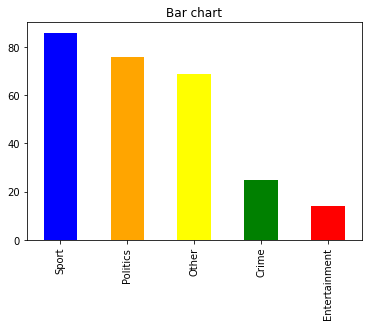

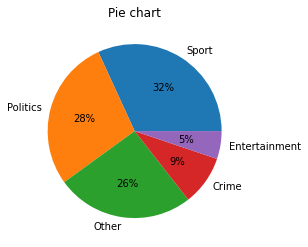

In [4]:
count_Class=pd.value_counts(df["LABEL"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange","yellow","Green","Red"])
plt.title('Bar chart')
plt.show()

count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X = df['stemming_words'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

predictions = text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

print(metrics.classification_report(y_test,predictions))



[[ 5  0  2  1  0]
 [ 0  0  2  0  4]
 [ 1  1  9  6  2]
 [ 2  0  3 16  4]
 [ 0  0  4  3 25]]
               precision    recall  f1-score   support

        Crime       0.62      0.62      0.62         8
Entertainment       0.00      0.00      0.00         6
        Other       0.45      0.47      0.46        19
     Politics       0.62      0.64      0.63        25
        Sport       0.71      0.78      0.75        32

     accuracy                           0.61        90
    macro avg       0.48      0.50      0.49        90
 weighted avg       0.58      0.61      0.59        90



In [11]:
predi = text_clf.predict(["ඔලිම්පික් ක්‍රීඩාවේ නිරත වන්නන් ටෝකියෝ බලා පිටත් වේ"])
print(predi)
predi = text_clf.predict(["ගුරු වැටුප් විෂමතා වලට විසඳුම් ලැබේ"])
print(predi)
predi = text_clf.predict([" ටෝකියෝ අත්අඩංගුවට පත්වේ"])
print(predi)

['Sport']
['Sport']
['Crime']
